In [42]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import matplotlib.ticker as ticker

In [2]:
%store -r select_states_population_change_df
%store -r select_states_sales_df
%store -r select_states_total_population_df 

In [3]:

select_states_population_change_df = select_states_population_change_df.rename(columns={'STNAME': 'State'})
select_states_population_change_df

,State,CTYNAME,Popestimate Yearly Change 2011(%),Popestimate Yearly Change 2012(%),Popestimate Yearly Change 2013(%),Popestimate Yearly Change 2014(%),Popestimate Yearly Change 2015(%),Popestimate Yearly Change 2016(%),Popestimate Yearly Change 2017(%),Popestimate Yearly Change 2018(%),Popestimate Yearly Change 2019(%),Popestimate Yearly Change 2020(%),Popestimate 10-Year Change 2020(%)
0,District of Columbia,District of Columbia,1.024795,1.024903,1.024888,1.018485,1.020209,1.015601,1.013821,1.010139,1.005831,1.006443,1.177659
1,Utah,Utah,1.014190,1.013979,1.015636,1.013645,1.015417,1.020316,1.019479,1.016630,1.015286,1.014515,1.170953
2,Texas,Texas,1.015990,1.017103,1.015163,1.018257,1.018746,1.016220,1.013504,1.011790,1.012655,1.012901,1.163176
49,Illinois,Illinois,1.002121,1.001185,1.000990,0.999171,0.998020,0.997055,0.996739,0.995680,0.995468,0.993725,0.980296
50,West Virginia,West Virginia,1.001262,1.000452,0.998558,0.997736,0.996089,0.994088,0.992495,0.993000,0.994081,0.994165,0.962531


In [4]:

select_states_total_population_df.index.names = ["State"]
select_states_total_population_df 
sel_states_tot_pop_df = select_states_total_population_df.reset_index()
sel_states_tot_pop_df 

,State,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,District of Columbia,District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,Illinois,Illinois,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,Texas,Texas,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,Utah,Utah,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,West Virginia,West Virginia,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [5]:
select_states_sales_df #main to work with

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
StateName,,,,,,,,,,,
IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [6]:
#select_states_sales_df.index.names = ["State"]
#sel_states_sales_df = select_states_sales_df.reset_index()
#sel_states_sales_df #main to work with

In [7]:
#Change the name of the header 
select_states_population_yearly_change_df = select_states_population_change_df.rename(columns={
    'STNAME': 'State',
    'Popestimate Yearly Change 2011(%)': '2011',
    'Popestimate Yearly Change 2012(%)': '2012',
    'Popestimate Yearly Change 2013(%)': '2013',
    'Popestimate Yearly Change 2014(%)': '2014',
    'Popestimate Yearly Change 2015(%)': '2015',
    'Popestimate Yearly Change 2016(%)': '2016',
    'Popestimate Yearly Change 2017(%)': '2017',
    'Popestimate Yearly Change 2018(%)': '2018',
    'Popestimate Yearly Change 2019(%)': '2019',
    'Popestimate Yearly Change 2020(%)': '2020'
})

select_states_population_yearly_change_df.pop('CTYNAME')
sel_states_pop_ych_df = select_states_population_yearly_change_df
sel_states_pop_ych_df #main to work with

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Popestimate 10-Year Change 2020(%)
0,District of Columbia,1.024795,1.024903,1.024888,1.018485,1.020209,1.015601,1.013821,1.010139,1.005831,1.006443,1.177659
1,Utah,1.014190,1.013979,1.015636,1.013645,1.015417,1.020316,1.019479,1.016630,1.015286,1.014515,1.170953
2,Texas,1.015990,1.017103,1.015163,1.018257,1.018746,1.016220,1.013504,1.011790,1.012655,1.012901,1.163176
49,Illinois,1.002121,1.001185,1.000990,0.999171,0.998020,0.997055,0.996739,0.995680,0.995468,0.993725,0.980296
50,West Virginia,1.001262,1.000452,0.998558,0.997736,0.996089,0.994088,0.992495,0.993000,0.994081,0.994165,0.962531


In [8]:
sel_states_pop_ych_df.columns

Index(['State', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Popestimate 10-Year Change 2020(%)'],
      dtype='object')

In [9]:
# drop all years but keep 10-year change
state_10y_change_df = sel_states_pop_ych_df.drop(columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
state_10y_change_df

,State,Popestimate 10-Year Change 2020(%)
0,District of Columbia,1.177659
1,Utah,1.170953
2,Texas,1.163176
49,Illinois,0.980296
50,West Virginia,0.962531


In [10]:
rename_dict = {'District of Columbia': 'WA', 'Utah': 'UT', 'Texas': 'TX', 'Illinois': 'IL', 'West Virginia': 'VA'}
state_10y_change_df['State'] = state_10y_change_df['State'].replace(rename_dict)
state_10y_change_df #main for population change plot

,State,Popestimate 10-Year Change 2020(%)
0,WA,1.177659
1,UT,1.170953
2,TX,1.163176
49,IL,0.980296
50,VA,0.962531


In [12]:
#Change the name of the header 
sel_states_tot_pop_df  = sel_states_tot_pop_df .rename(columns={
    'STNAME': 'State',
    'POPESTIMATE2010': '2010',
    'POPESTIMATE2011': '2011',
    'POPESTIMATE2012': '2012',
    'POPESTIMATE2013': '2013',
    'POPESTIMATE2014': '2014',
    'POPESTIMATE2015': '2015',
    'POPESTIMATE2016': '2016',
    'POPESTIMATE2017': '2017',
    'POPESTIMATE2018': '2018',
    'POPESTIMATE2019': '2019',
    'POPESTIMATE2020': '2020'
})

sel_states_tot_pop_df 

,State,CTYNAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,Illinois,Illinois,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,Texas,Texas,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,Utah,Utah,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,West Virginia,West Virginia,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [13]:
# Create a dictionary to rename the states
rename_dict = {'District of Columbia': 'WA', 'Utah': 'UT', 'Texas': 'TX', 'Illinois': 'IL', 'West Virginia': 'VA'}

In [14]:
# Rename the states
sel_states_tot_pop_df['State'] = sel_states_tot_pop_df['State'].replace(rename_dict)
total_population_df = sel_states_tot_pop_df.drop(columns = 'CTYNAME')
total_population_df  #main to work with

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,WA,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,IL,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,TX,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,UT,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,VA,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [15]:
%store total_population_df

Stored 'total_population_df' (DataFrame)


In [16]:
# Graphs 
state_10y_change_df
#state_10y_change_df.set_index('State', inplace=True)


,State,Popestimate 10-Year Change 2020(%)
0,WA,1.177659
1,UT,1.170953
2,TX,1.163176
49,IL,0.980296
50,VA,0.962531


TypeError: '>=' not supported between instances of 'str' and 'float'

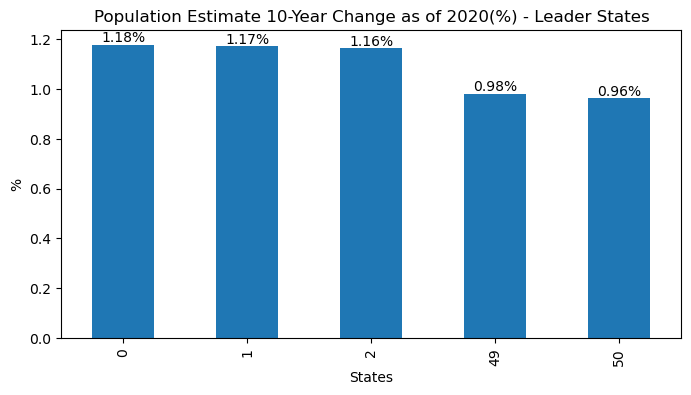

In [18]:
# Create a bar chart without legend
ax = state_10y_change_df.plot(kind="bar", figsize=(8, 4), title="Population Estimate 10-Year Change as of 2020(%) - Leader States",
                             xlabel="States",
                             ylabel="%",
                             legend=False)
# Add data labels in the middle of the bars
for p in ax.patches:
    label_text = f"{p.get_height():.2f}%"  # Format to two decimal places
    ax.annotate(label_text, ((p.get_x() + p.get_width() / 2), p.get_height()), ha='center', va='bottom')

# Adjust the ylim to add more space above the bars
ax.set_ylim(0, max(state_10y_change_df.max(axis=1)) + 0.2)  # Find the maximum value column-wise and add space

plt.show()
plt.tight_layout()

In [19]:
# Save the plot as image
plt.savefig('Population % Change 10 year', dpi=300)

<Figure size 640x480 with 0 Axes>

In [30]:
# Residential Sales Graph
select_states_sales_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [31]:
# Graph for sales in each state out of selected states
#select_states_sales_df.index.names = ["State"]
#sales_df = select_states_sales_df.reset_index()


In [32]:
# Transpose the DataFrame to have years as rows
select_states_sales_df = select_states_sales_df.transpose()
select_states_sales_df

State,IL,TX,UT,VA,WA
2010,59779.0,93241.0,18356.0,70839.0,26889.0
2011,59571.0,94298.0,19235.0,65667.0,27330.0
2012,74902.0,112232.0,24019.0,75558.0,37158.0
2013,93725.0,134382.0,27369.0,87705.0,46846.0
2014,100689.0,136227.0,27877.0,84784.0,48530.0
2015,113144.0,144533.0,33008.0,95447.0,57052.0
2016,123797.0,151306.0,35399.0,104942.0,63002.0
2017,123867.0,154065.0,34867.0,111890.0,65469.0
2018,129384.0,154210.0,33972.0,110752.0,60361.0
2019,122175.0,158770.0,34607.0,115225.0,58065.0


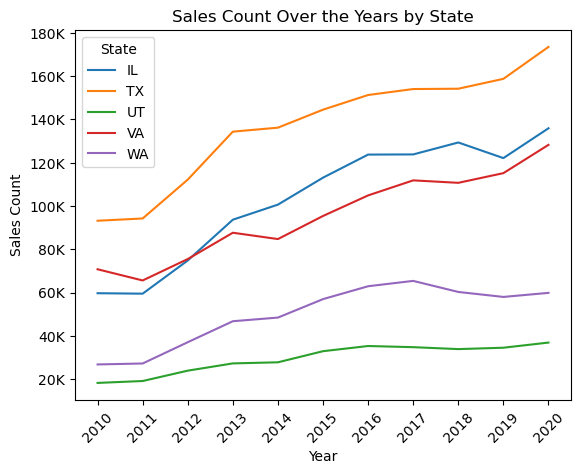

<Figure size 640x480 with 0 Axes>

In [48]:
# Plot a line chart for each state
for state in select_states_sales_df.columns:
    plt.plot(select_states_sales_df.index, select_states_sales_df[state], label=state)

# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(title='State')

# Add a title to the plot
plt.title('Sales Count Over the Years by State')

# Modify Y-axis labels to display in thousands
def format_thousands(x, pos):
    return f'{x/1000:.0f}K'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Save the plot as a JPG image
plt.savefig('sales_count_over_time.jpg', format='jpg')